# Algoritmo de Determinação de Fase

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import *

In [14]:
# Porta que implementa a transformada de Fourier Quântica Inversa

def QFTdgr(n, show_barrier=False):
    qft_circuit = QuantumCircuit(n)
    
    for i in range(n // 2 - 1, -1, -1):
        qft_circuit.swap(i, n - 1 - i)
        
    for i in range(n-1, -1, -1):
        
        k = n - i
        
        if show_barrier:
            qft_circuit.barrier()
        
        for j in range(n-1, i, -1):
            qft_circuit.cp(-2 * np.pi/ 2 ** k, j, i)
            k -= 1
        qft_circuit.h(i)
               
    
    return qft_circuit

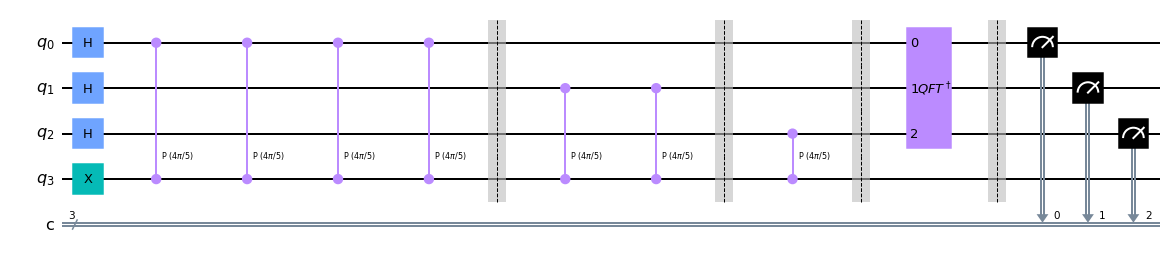

In [73]:
# Algoritmo de estimativa de fase (Phase Estimation)

t = 3
phi = 0.4
angle = 2 * np.pi * phi

Uqft_dgr = QFTdgr(t).to_gate(label=r"${QFT}^\dagger$")


qpe = QuantumCircuit(t+1, t)

qpe.h(range(t))

qpe.x(t)

repetitions = 2 ** (t - 1)

for i in range(t):
    for j in range(repetitions):
        qpe.cp(angle, i, t)
        
    repetitions //= 2
    
    qpe.barrier()

qpe.append(Uqft_dgr, range(t))

qpe.barrier()

qpe.measure(range(t), range(t))

qpe.draw('mpl', fold=-1)

In [80]:
# Execução do circuito

backend = Aer.get_backend('qasm_simulator')

result = execute(qpe, backend = backend, shots=1).result()
resultado = result.get_counts()

print(resultado)

{'110': 1}


In [81]:
# Conversão do estado medido na fase
val = [int(j[::-1], 2) * 2 ** (-t) for j in resultado.keys()][0]

print("Valor do ângulo:", phi)
print("valor obtido através do algoritmo:", val)

Valor do ângulo: 0.4
valor obtido através do algoritmo: 0.375
